#python 3.9 v 21.1.2

Dependencies:

1. pandas
2. numpy
3. matplotlib
4. seaborn
5. plotly
6. sklearn
7. xgboost
8. eli5
9. os
10. re
11. warnings

# Car Price Prediction - MATHCO.THON

This notebook is an attempt at a regression challenge given by The Math Company hosted by MachineHack.

The notebook is divided in 6 parts here.

1. **Load Data**
2. **Know your Data**
3. **Data Cleaning**
4. **Data Visualization(EDA)**
5. **ML - Model Building and prediction**
6. **ML - Explainability**

In [1]:
#importing required libraries.
import pandas as pd #data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt #visualization libraries
from mpl_toolkits.mplot3d import Axes3D #3-D plots
import seaborn as sns #visualization libraries
import plotly.express as px #visualization libraries
pd.plotting.register_matplotlib_converters() #register pandas formatters and converters with matplotlib.

# to plot visualizations inline with the notebook
%matplotlib inline

#os, regex and warnings
import os,re,warnings
#filter warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

c:\users\kgmgy\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\kgmgy\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\users\kgmgy\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#preprocessing, scaling, ML models and evaluation metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import make_scorer

import tensorflow as tf
from tensorflow import keras

Defining necessary functions

In [3]:
#below is a function defined to evaluate rmsle
#it takes training and validation datasets and target arrays as its input along with the model.
def score(X_train, X_valid, y_train, y_valid, model):
    model = model
    model.fit(X_train, y_train) #training
    preds = model.predict(X_valid) #prediction
    #since log will throw error for negative predicted values we will impute them with mean of 1 percentage of total predicted values
    preds = np.where(preds<0,np.percentile(preds,1),preds)
    rmsle = round(np.sqrt(msle(y_valid, preds)),5) #evaluation
    return rmsle

## Load Data:

In [4]:
for dirname, _,filenames in os.walk('D:\Data Science\Competitions\MachineHack'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

D:\Data Science\Competitions\MachineHack\submission.csv
D:\Data Science\Competitions\MachineHack\Submission_Car_Price.csv
D:\Data Science\Competitions\MachineHack\test.csv
D:\Data Science\Competitions\MachineHack\train.csv


In [5]:
df_train = pd.read_csv(r'D:\Data Science\Competitions\MachineHack\train.csv')
df_train.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [6]:
df_test = pd.read_csv(r'D:\Data Science\Competitions\MachineHack\test.csv')
df_test.head()

ID Levy Manufacturer   Model  Prod. year   Category Leather interior  \
0  44020629    -   VOLKSWAGEN    Golf        2012  Hatchback               No   
1  45784798    -      HYUNDAI  Sonata        2012      Sedan              Yes   
2  45800257    -       NISSAN   Tiida        2005      Sedan               No   
3  45797981  975        VOLVO    XC90        2012       Jeep              Yes   
4  45814303    -         OPEL   Astra        1993  Hatchback               No   

  Fuel type Engine volume    Mileage  Cylinders Gear box type Drive wheels  \
0    Diesel     2.0 Turbo       0 km          4        Manual        Front   
1    Petrol           2.4   26000 km          4     Tiptronic        Front   
2    Petrol           1.5  168000 km          4     Automatic        Front   
3    Petrol           3.2  143000 km          6     Automatic          4x4   
4    Petrol           1.6  200000 km          4        Manual        Front   

    Doors             Wheel     Color  Airbags  Price  
0  02-Mar        Left wheel      Grey       10    NaN  
1  04-May        Left wheel      Grey       10    NaN  
2  04-May  Right-hand drive  Sky blue        8    NaN  
3  04-May        Left wheel      Blue       12    NaN  
4  04-May        Left wheel     Black        0    NaN

## Know your Data:

In [7]:
print("There are {0} examples and {1} data fields in training dataset".format(df_train.shape[0],df_train.shape[1]))
print("There are {0} examples and {1} data fields in test dataset".format(df_test.shape[0],df_test.shape[1]))

There are 19237 examples and 18 data fields in training dataset
There are 8245 examples and 18 data fields in test dataset


In [8]:
print(df_train.columns,"\n",df_test.columns)

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object') 
 Index(['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8245 non-null   int64  
 1   Levy              8245 non-null   object 
 2   Manufacturer      8245 non-null   object 
 3   Model             8245 non-null   object 
 4   Prod. year        8245 non-null   int64  
 5   Category          8245 non-null   object 
 6   Leather interior  8245 non-null   object 
 7   Fuel type         8245 non-null   object 
 8   Engine volume     8245 non-null   object 
 9   Mileage           8245 non-null   object 
 10  Cylinders         8245 non-null   int64  
 11  Gear box type     8245 non-null   object 
 12  Drive wheels      8245 non-null   object 
 13  Doors             8245 non-null   object 
 14  Wheel             8245 non-null   object 
 15  Color             8245 non-null   object 
 16  Airbags           8245 non-null   int64  


Training Data:

In [11]:
print('\033[1m'+"Datatype    #"+'\033[0m')
print(df_train.dtypes.value_counts())

Datatype    #
object     13
int64       4
float64     1
dtype: int64


Test data has following datatypes

In [12]:
print('\033[1m'+"Datatype    #"+'\033[0m')
print(df_test.dtypes.value_counts())

Datatype    #
object     13
int64       4
float64     1
dtype: int64


In [13]:
print("No of duplicate entries in training data:{}".format(len(df_train.loc[df_train.duplicated()])))

No of duplicate entries in training data:313


In [14]:
print("No of duplicate entries in test data:{}".format(len(df_test.loc[df_test.duplicated()])))

No of duplicate entries in test data:75


In [15]:
for col in df_train.columns:
    if df_train[col].isnull().any():
        print("There are {1} null values in {0} column".format(col, df_train[col].isnull().sum()))
    else:
        print("No null values in {} column".format(col))

No null values in ID column
No null values in Price column
No null values in Levy column
No null values in Manufacturer column
No null values in Model column
No null values in Prod. year column
No null values in Category column
No null values in Leather interior column
No null values in Fuel type column
No null values in Engine volume column
No null values in Mileage column
No null values in Cylinders column
No null values in Gear box type column
No null values in Drive wheels column
No null values in Doors column
No null values in Wheel column
No null values in Color column
No null values in Airbags column


In [16]:
for col in df_test.columns:
    if df_test[col].isnull().any():
        print("There are {1} null values in {0} column".format(col, df_test[col].isnull().sum()))
    else:
        print("No null values in {} column".format(col))

No null values in ID column
No null values in Levy column
No null values in Manufacturer column
No null values in Model column
No null values in Prod. year column
No null values in Category column
No null values in Leather interior column
No null values in Fuel type column
No null values in Engine volume column
No null values in Mileage column
No null values in Cylinders column
No null values in Gear box type column
No null values in Drive wheels column
No null values in Doors column
No null values in Wheel column
No null values in Color column
No null values in Airbags column
There are 8245 null values in Price column


In [17]:
for col in df_train.columns:
    print(col,df_train[col].unique())

ID [45654403 44731507 45774419 ... 45804997 45793526 45813273]
Price [13328 16621  8467 ... 56814 63886 22075]
Levy ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '14

In [18]:
for col in df_test.columns:
    print(col,df_test[col].unique())

ID [44020629 45784798 45800257 ... 45649860 45809706 45813163]
Levy ['-' '975' '639' '1646' '1172' '891' '645' '609' '663' '765' '585' '696'
 '531' '530' '777' '586' '1053' '1190' '781' '707' '490' '919' '1266'
 '1850' '836' '730' '503' '697' '474' '1714' '751' '382' '502' '769' '640'
 '761' '1017' '1077' '1750' '831' '1249' '1058' '650' '259' '1292' '1935'
 '1675' '1083' '521' '584' '1094' '642' '397' '1399' '1342' '583' '1211'
 '551' '1091' '1624' '1024' '779' '915' '501' '649' '1325' '1995' '1363'
 '878' '966' '562' '1408' '607' '638' '1076' '934' '475' '1055' '978'
 '2297' '1360' '1051' '1268' '790' '1018' '690' '749' '441' '1438' '862'
 '518' '1185' '1673' '900' '1282' '1138' '753' '394' '917' '1883' '1405'
 '1111' '1234' '399' '687' '1659' '333' '1613' '308' '2080' '830' '1537'
 '694' '1811' '784' '629' '1011' '1493' '155' '1968' '1080' '988' '746'
 '1324' '1664' '1267' '2908' '1104' '574' '528' '1760' '1202' '4746'
 '1174' '924' '462' '843' '3061' '364' '738' '456' '770' '833' '

In [19]:
cat_cols= [col for col in df_train.columns if df_train[col].dtype=="object"]
print(cat_cols)

['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']


In [20]:
num_cols= [col for col in df_train.columns if df_train[col].dtype in ["int64","float64"]]
print(num_cols)

['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']


In [21]:
len(df_train.loc[df_train["Levy"] =="-"])

5819

In [22]:
len(df_test.loc[df_test["Levy"] =="-"])

2454

In [23]:
for i in ["02-Mar","04-May",">5"]:
    print(i,":", len(df_train.loc[df_train["Doors"]==i]))

02-Mar : 777
04-May : 18332
>5 : 128


In [24]:
for i in ["02-Mar","04-May",">5"]:
    print(i,":", len(df_test.loc[df_test["Doors"]==i]))

02-Mar : 352
04-May : 7841
>5 : 52


In [25]:
print(len(df_train.loc[df_train["Model"]=="09-Mar"]))

2


In [26]:
print(len(df_test.loc[df_test["Model"]=="09-Mar"]))

2


### Data Assessment:
1. Presence of duplicated rows is observed in both training and test data.
2. Upon assessing the dataset it can be seen that there are three numeric data fields(Levy, Engine volume, Mileage) which are stored as categorical data.
3. **Levy**  has "-" value present which is supposed to be a null value otherwise, but here it has camoflauged itself as a different value hence misleading us about presence of null values.
4. **Engine volume** also contains information about type of engine(efficieny) along with the volume of the engine.
5. **Mileage** has a km at the end of the value making it a string instead of numeric value.
6. **Doors** which can seen to be taking date format is actually  a range 02-03 is captured as 02-Mar and 04-05 is being captured as 04-May, though >5 stays same.
7. **Model** has one value 09-03 being captured as 09-Mar in a similar fashion as mentioned above, though it is tough to spot amongst 1500+ values, but we are sure no car model is a date for sure so it needs correction.
8. It is obvious that **Price** column in the test dataset has all Null values in it, and we will just not be doing anything about it.

## Data Cleaning

1. Dropping duplicates from training is an obvious choice as in linear algebra terms any dependent columns or rows in a matrix will make it singular and though it can be dealt with but why making it hard choice for our training model when we can be carefree by dropping them. Though much can we do about test data since we need to submit exact number of predictions we will leave test dataset as is.
2. Converting the **Levy**, **Engine volume** and **Mileage** columns to numeric from categorical. Before that steps 3-5 to be executed.
3. "-" is just NaN, and it is true that Levy isn't applicable for sale of cars at some regions/districts/states so instead of imputing it with Mean or Median as a go-to method for dealing null values substituting them with 0 seems an appropriate choice.
4. Engine volume to be split into two columns and replaced with the numeric value.
5. **Mileage** to be split and replaced with the numeric value and some of the values are found to be zero which will be replaced with mean value.
6. **Doors** corrected values are replaced in their respective indeces.
7. **Model** corrected values are replaced in their respective indeces.
8. **Wheel** has Left wheel and Right-hand drive values, to make both similar Left wheel will be changed to Left-hand drive.

### Feature Engineering
1. Creation of **Engine Type** capturing 'Turbo' using str.split from **Engine volume** and null values to be imputed with 'Non-Turbo' as the value.
2. Creation of feature **Age** which is age of Car derived from **Prod. year** to make it a negatively correlated feature with target Price.

### Removal of outliers
Statistical methods help us derive outliers based on IQR and percentiles and ideally it is best to drop those outliers but in a practical approach discarding all outliers result in a poor performance. So after few attempts and twitching the range of outliers dropped along with their impact on model performance, only extreme values amongst outliers are removed from **Engine volume**, **Mileage** and **Price**.

In [27]:
df_train.loc[df_train.duplicated()]

ID  Price  Levy   Manufacturer        Model  Prod. year  \
425    45815372   7840     -  MERCEDES-BENZ        E 200        1998   
1581   45815363   8781     -         TOYOTA          Ist        2002   
1697   45732125  18503     -         TOYOTA        Prius        2010   
1972   45507765  20385     -  MERCEDES-BENZ      CLS 500        2005   
2131   45815363   8781     -         TOYOTA          Ist        2002   
...         ...    ...   ...            ...          ...         ...   
18974  45815465   2352  1273          LEXUS       IS 350        2015   
19137  45810466  15125   642      CHEVROLET      Orlando        2012   
19200  45725908  36065   640  MERCEDES-BENZ  CLA 250 AMG        2013   
19203  45761487  13485   645         TOYOTA        Prius        2011   
19210  45732939   8311   642        HYUNDAI       Sonata        2012   

        Category Leather interior Fuel type Engine volume    Mileage  \
425        Sedan               No       CNG             2  180003 km   
1581   Hatchback               No    Petrol           1.5  117000 km   
1697       Sedan               No    Petrol           1.8  162000 km   
1972       Sedan              Yes    Petrol             5  230000 km   
2131   Hatchback               No    Petrol           1.5  117000 km   
...          ...              ...       ...           ...        ...   
18974      Sedan              Yes    Petrol           3.5   80856 km   
19137       Jeep              Yes    Diesel             2  156834 km   
19200      Sedan              Yes    Petrol     2.0 Turbo   68000 km   
19203      Sedan               No    Hybrid           1.8  281600 km   
19210      Sedan              Yes       LPG             2   36545 km   

       Cylinders Gear box type Drive wheels   Doors             Wheel   Color  \
425          4.0        Manual         Rear  04-May        Left wheel   Black   
1581         4.0     Automatic          4x4  04-May  Right-hand drive     Red   
1697         4.0     Automatic        Front  04-May        Left wheel    Grey   
1972         8.0     Tiptronic         Rear  04-May        Left wheel  Silver   
2131         4.0     Automatic          4x4  04-May  Right-hand drive     Red   
...          ...           ...          ...     ...               ...     ...   
18974        6.0     Automatic          4x4  04-May        Left wheel   Black   
19137        4.0     Automatic        Front  04-May        Left wheel  Golden   
19200        4.0     Tiptronic        Front  04-May        Left wheel     Red   
19203        6.0     Automatic        Front  04-May        Left wheel    Grey   
19210        4.0     Automatic        Front  04-May        Left wheel   White   

       Airbags  
425          4  
1581         4  
1697        12  
1972        10  
2131         4  
...        ...  
18974       12  
19137        4  
19200       12  
19203        8  
19210        4  

[313 rows x 18 columns]

In [28]:
df_train.drop_duplicates(keep='last',inplace=True)

In [29]:
df_train.reset_index()

index        ID  Price  Levy   Manufacturer     Model  Prod. year  \
0          0  45654403  13328  1399          LEXUS    RX 450        2010   
1          2  45774419   8467     -          HONDA       FIT        2006   
2          3  45769185   3607   862           FORD    Escape        2011   
3          4  45809263  11726   446          HONDA       FIT        2014   
4          5  45802912  39493   891        HYUNDAI  Santa FE        2016   
...      ...       ...    ...   ...            ...       ...         ...   
18919  19232  45798355   8467     -  MERCEDES-BENZ   CLK 200        1999   
18920  19233  45778856  15681   831        HYUNDAI    Sonata        2011   
18921  19234  45804997  26108   836        HYUNDAI    Tucson        2010   
18922  19235  45793526   5331  1288      CHEVROLET   Captiva        2007   
18923  19236  45813273    470   753        HYUNDAI    Sonata        2012   

        Category Leather interior Fuel type Engine volume    Mileage  \
0           Jeep              Yes    Hybrid           3.5  186005 km   
1      Hatchback               No    Petrol           1.3  200000 km   
2           Jeep              Yes    Hybrid           2.5  168966 km   
3      Hatchback              Yes    Petrol           1.3   91901 km   
4           Jeep              Yes    Diesel             2  160931 km   
...          ...              ...       ...           ...        ...   
18919      Coupe              Yes       CNG     2.0 Turbo  300000 km   
18920      Sedan              Yes    Petrol           2.4  161600 km   
18921       Jeep              Yes    Diesel             2  116365 km   
18922       Jeep              Yes    Diesel             2   51258 km   
18923      Sedan              Yes    Hybrid           2.4  186923 km   

       Cylinders Gear box type Drive wheels   Doors             Wheel   Color  \
0            6.0     Automatic          4x4  04-May        Left wheel  Silver   
1            4.0      Variator        Front  04-May  Right-hand drive   Black   
2            4.0     Automatic          4x4  04-May        Left wheel   White   
3            4.0     Automatic        Front  04-May        Left wheel  Silver   
4            4.0     Automatic        Front  04-May        Left wheel   White   
...          ...           ...          ...     ...               ...     ...   
18919        4.0        Manual         Rear  02-Mar        Left wheel  Silver   
18920        4.0     Tiptronic        Front  04-May        Left wheel     Red   
18921        4.0     Automatic        Front  04-May        Left wheel    Grey   
18922        4.0     Automatic        Front  04-May        Left wheel   Black   
18923        4.0     Automatic        Front  04-May        Left wheel   White   

       Airbags  
0           12  
1            2  
2            0  
3            4  
4            4  
...        ...  
18919        5  
18920        8  
18921        4  
18922        4  
18923       12  

[18924 rows x 19 columns]

In [30]:
df_train["ID"].loc[df_train.duplicated()].count() #proof testing the removal of duplicates

0

In [31]:
df_train["Levy"] = df_train["Levy"].replace("-",value =0)

In [32]:
df_train["Levy"] = df_train["Levy"].astype(int)

In [33]:
df_train["Levy"].value_counts()

0       5709
765      482
891      453
639      403
640      398
        ... 
2908       1
1279       1
3156       1
4283       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [34]:
df_test["Levy"].replace("-",value=0,inplace=True)
df_test["Levy"].value_counts()

0       2454
765      222
891      204
640      177
639      165
        ... 
4053       1
1442       1
676        1
1301       1
884        1
Name: Levy, Length: 434, dtype: int64

In [35]:
df_test["Levy"] = pd.to_numeric(df_test["Levy"])

In [36]:
df_train['Doors'].replace({'04-May':'04-05' , '02-Mar':'02-03'}, inplace=True)

In [37]:
df_train['Doors'].unique()

array(['04-05', '02-03', '>5'], dtype=object)

In [38]:
df_test['Doors'].replace({'04-May':'04-05' , '02-Mar':'02-03'}, inplace=True)

In [39]:
df_test['Doors'].unique()

array(['02-03', '04-05', '>5'], dtype=object)

In [40]:
df_train["Model"].replace("09-Mar",value="09-03",inplace=True)

In [41]:
df_test["Model"].replace("09-Mar",value="09-03",inplace=True)

In [42]:
df_train["Engine Type"] = df_train["Engine volume"].str.extract('([A-Za-z]+)', expand = False)
df_train["Engine Type"].unique()

array([nan, 'Turbo'], dtype=object)

In [43]:
df_train["Engine Type"].fillna(value="Non-Turbo",inplace=True)
df_train["Engine Type"].unique()

array(['Non-Turbo', 'Turbo'], dtype=object)

In [44]:
df_train["Engine volume"] = df_train["Engine volume"].str.replace(' Turbo','')

In [45]:
df_train["Engine volume"] = pd.to_numeric(df_train["Engine volume"])
df_train["Engine volume"].unique()

array([ 3.5,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,  4.7,
        1.5,  3. ,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,  1.2,
        5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,  2.1,
        0.7,  5.4,  4.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [46]:
df_test["Engine Type"] = df_test["Engine volume"].str.extract('([A-Za-z]+)', expand = False)
df_test["Engine Type"].unique()

array(['Turbo', nan], dtype=object)

In [47]:
df_test["Engine Type"].fillna(value="Non-Turbo",inplace=True)
df_test["Engine Type"].unique()

array(['Turbo', 'Non-Turbo'], dtype=object)

In [48]:
df_test["Engine volume"] = df_test["Engine volume"].str.replace(' Turbo','')

In [49]:
df_test["Engine volume"] = pd.to_numeric(df_test["Engine volume"])
df_test["Engine volume"].unique()

array([ 2. ,  2.4,  1.5,  3.2,  1.6,  4.6,  3.5,  1.8,  2.5,  1.7,  2.2,
        2.3,  4. ,  1.3,  3. ,  1.4,  3.3,  2.9,  4.8,  3.6,  2.7,  1. ,
        0.7,  5.5,  4.4,  4.7,  5. ,  1.2,  2.8,  3.8,  2.6,  5.3,  3.7,
        5.7,  6.6,  0.2,  6.4,  5.6,  1.9,  3.4,  6.7,  0.4,  4.2,  2.1,
        6.2,  0.8,  0. ,  6. ,  4.3,  1.1,  3.1,  0.6,  4.5,  6.3,  6.1,
        0.5, 10.8,  5.4,  0.3,  5.2,  3.9])

In [50]:
df_train["Mileage"] = df_train.Mileage.apply(lambda x : x.split(" ")[0])

In [51]:
df_train["Mileage"] = df_train["Mileage"].astype(int)

In [52]:
df_test["Mileage"] = df_test.Mileage.apply(lambda x : x.split(" ")[0])

In [53]:
df_test["Mileage"] = df_test["Mileage"].astype(int)

In [54]:
df_train['Wheel'].replace("Left wheel", value = "Left-hand drive" , inplace=True)
df_train['Wheel'].unique()

array(['Left-hand drive', 'Right-hand drive'], dtype=object)

In [55]:
df_test['Wheel'].replace("Left wheel", value = "Left-hand drive" , inplace=True)
df_test['Wheel'].unique()

array(['Left-hand drive', 'Right-hand drive'], dtype=object)

In [56]:
df_train['Airbags'] = df_train['Airbags'].astype(int)

In [57]:
df_test['Airbags'] = df_test['Airbags'].astype(int)

In [58]:
df_train["Age"] = 2020-df_train["Prod. year"]
df_train["Age"] = df_train["Age"].astype(int)
df_train["Prod. year"] = df_train["Prod. year"].astype(str)

In [59]:
df_test["Age"] = 2020-df_test["Prod. year"]
df_test["Age"] = df_test["Age"].astype(int)
df_test["Prod. year"] = df_test["Prod. year"].astype(str)

### Removal of outliers

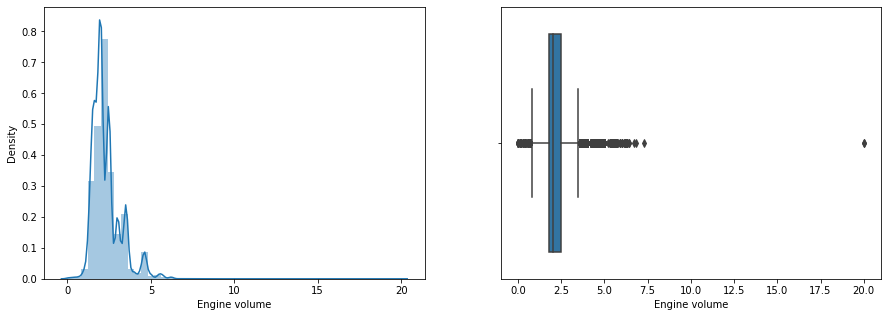

<AxesSubplot:xlabel='Engine volume', ylabel='Price'>

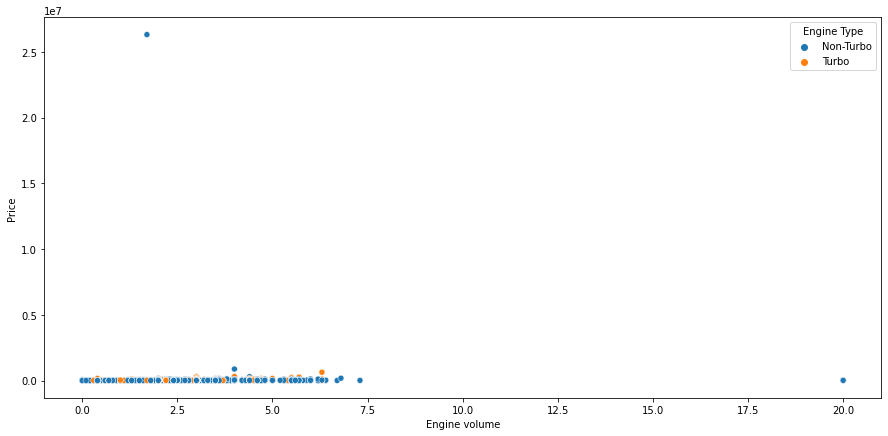

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df_train["Engine volume"])
plt.subplot(1,2,2)
sns.boxplot(df_train["Engine volume"])
plt.show()
plt.figure(figsize=(15,7))
#sns.scatterplot(x=df_train.loc[df_train["Engine volume"]<20]["Engine volume"]\
               # ,y=df_train.loc[df_train["Price"]<25*10**6]["Price"],hue = df_train["Engine Type"])
sns.scatterplot(x=df_train["Engine volume"],y=df_train["Price"],hue = df_train["Engine Type"])

In [61]:
df_train.drop(df_train[df_train["Engine volume"]>10].index,axis=0,inplace=True)
df_train["Engine volume"].unique()

array([3.5, 1.3, 2.5, 2. , 1.8, 2.4, 4. , 1.6, 3.3, 2.2, 4.7, 1.5, 3. ,
       1.4, 3.6, 2.3, 5.5, 2.8, 3.2, 3.8, 4.6, 1.2, 5. , 1.7, 2.9, 0.5,
       1.9, 2.7, 4.8, 5.3, 0.4, 1.1, 2.1, 0.7, 5.4, 4.4, 3.7, 1. , 2.6,
       0.8, 0.2, 5.7, 6.7, 6.2, 3.4, 6.3, 4.3, 4.2, 0. , 0.3, 5.9, 5.6,
       6. , 0.6, 6.8, 4.5, 7.3, 0.1, 3.1, 6.4, 3.9, 0.9, 5.2, 5.8])

In [62]:
df_train.shape

(18922, 20)

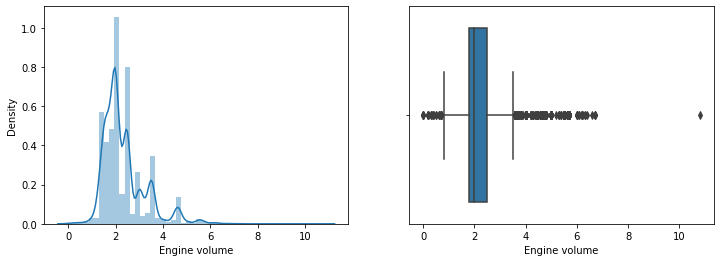

In [63]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df_test["Engine volume"])
plt.subplot(1,2,2)
sns.boxplot(df_test["Engine volume"])
plt.show()

In [64]:
df_test.loc[df_test["Engine volume"]>10]

ID  Levy Manufacturer          Model Prod. year Category  \
3573  45781620     0         სხვა  kamaz/ კამაზი       2005    Sedan   

     Leather interior Fuel type  Engine volume  Mileage  Cylinders  \
3573               No    Diesel           10.8     1000          8   

     Gear box type Drive wheels  Doors             Wheel Color  Airbags  \
3573        Manual         Rear  02-03  Right-hand drive   Red        0   

      Price Engine Type  Age  
3573    NaN   Non-Turbo   15

In [65]:
index = df_train.loc[df_train["Mileage"]>10**8].index
df_train.drop(index=index,axis=0,inplace=True)

In [66]:
index = df_train.query('Mileage==0 and Age>0').index
index

Int64Index([   11,    24,    26,    83,    97,   122,   125,   182,   187,
              214,
            ...
            18922, 18987, 19016, 19043, 19047, 19064, 19088, 19103, 19218,
            19223],
           dtype='int64', length=709)

In [67]:
mil_mean = np.mean(df_train['Mileage'])
df_train.loc[index,'Mileage'] = mil_mean

In [68]:
index = df_test.query('Mileage==0 and Age>0').index
index

Int64Index([   0,   15,   27,   30,   73,   85,  123,  163,  195,  199,
            ...
            8022, 8070, 8086, 8093, 8103, 8119, 8136, 8156, 8171, 8185],
           dtype='int64', length=291)

In [69]:
mil_mean = np.mean(df_test['Mileage'])
df_test.loc[index,'Mileage'] = mil_mean

In [70]:
df_train.shape

(18903, 20)

In [71]:
df_train["Price"].sort_values()

16992           1
7815            1
221             3
753             3
4776            3
           ...   
9367       297930
5008       308906
1225       627220
8541       872946
16983    26307500
Name: Price, Length: 18903, dtype: int64

<AxesSubplot:xlabel='Price'>

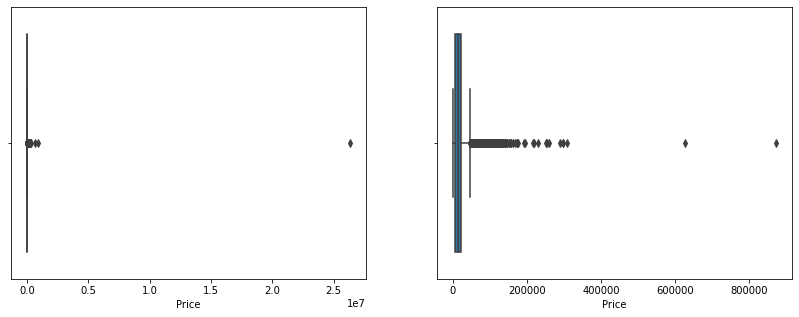

In [72]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(df_train['Price'])
plt.subplot(1,2,2)
sns.boxplot(df_train[df_train['Price']<26000000]['Price'])

Dropping values in **Price** which are greater than 600000.

In [73]:
index = df_train.loc[df_train["Price"]>600000].index
df_train.drop(index,axis=0,inplace=True)
df_train.shape

(18900, 20)

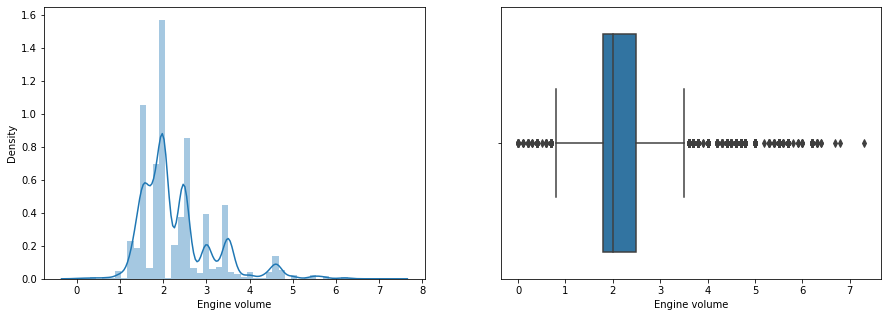

<AxesSubplot:xlabel='Engine volume', ylabel='Price'>

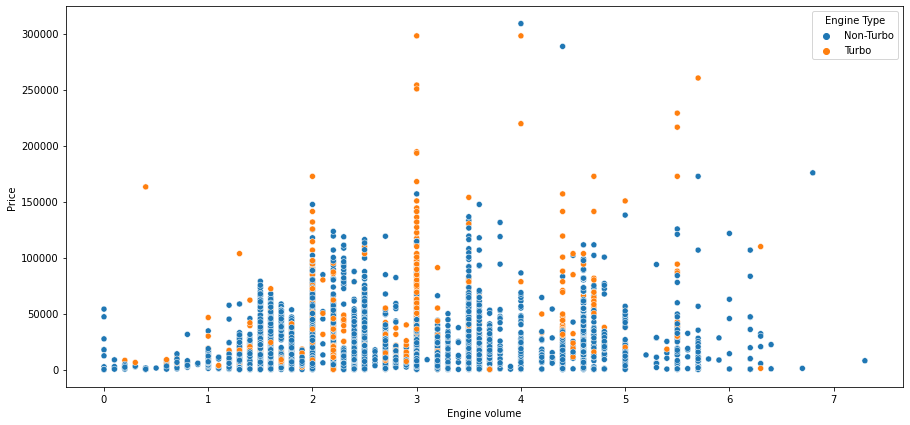

In [74]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df_train["Engine volume"])
plt.subplot(1,2,2)
sns.boxplot(df_train["Engine volume"])
plt.show()
plt.figure(figsize=(15,7))
#sns.scatterplot(x=df_train.loc[df_train["Engine volume"]<20]["Engine volume"]\
               # ,y=df_train.loc[df_train["Price"]<25*10**6]["Price"],hue = df_train["Engine Type"])
sns.scatterplot(x=df_train["Engine volume"],y=df_train["Price"],hue = df_train["Engine Type"])

<AxesSubplot:xlabel='Price'>

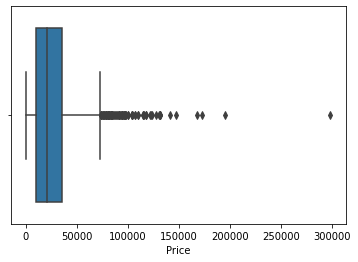

In [75]:
sns.boxplot(df_train.query('`Fuel type`=="Diesel"')['Price'])

In [76]:
index = df_train.query('`Fuel type`=="Diesel" and Price >250000').index
df_train.drop(index,axis=0,inplace=True)

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18899 entries, 0 to 19236
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18899 non-null  int64  
 1   Price             18899 non-null  int64  
 2   Levy              18899 non-null  int32  
 3   Manufacturer      18899 non-null  object 
 4   Model             18899 non-null  object 
 5   Prod. year        18899 non-null  object 
 6   Category          18899 non-null  object 
 7   Leather interior  18899 non-null  object 
 8   Fuel type         18899 non-null  object 
 9   Engine volume     18899 non-null  float64
 10  Mileage           18899 non-null  float64
 11  Cylinders         18899 non-null  float64
 12  Gear box type     18899 non-null  object 
 13  Drive wheels      18899 non-null  object 
 14  Doors             18899 non-null  object 
 15  Wheel             18899 non-null  object 
 16  Color             18899 non-null  object

In [78]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8245 non-null   int64  
 1   Levy              8245 non-null   int64  
 2   Manufacturer      8245 non-null   object 
 3   Model             8245 non-null   object 
 4   Prod. year        8245 non-null   object 
 5   Category          8245 non-null   object 
 6   Leather interior  8245 non-null   object 
 7   Fuel type         8245 non-null   object 
 8   Engine volume     8245 non-null   float64
 9   Mileage           8245 non-null   float64
 10  Cylinders         8245 non-null   int64  
 11  Gear box type     8245 non-null   object 
 12  Drive wheels      8245 non-null   object 
 13  Doors             8245 non-null   object 
 14  Wheel             8245 non-null   object 
 15  Color             8245 non-null   object 
 16  Airbags           8245 non-null   int32  


## Data Visualization (EDA)

<AxesSubplot:>

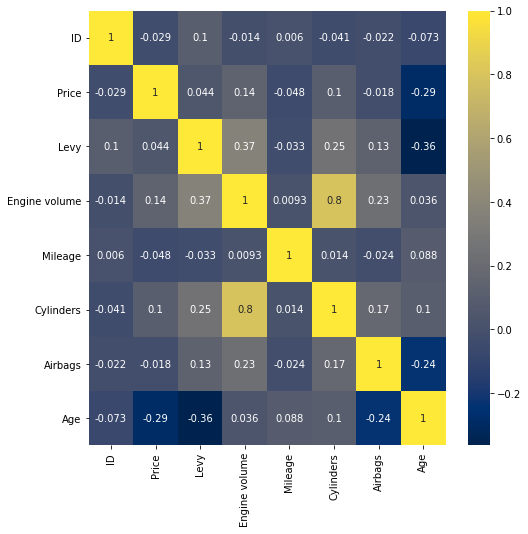

In [79]:
corr = df_train.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True, cmap='cividis')

### Correlation
   >Above heatmap shows that **Price** is correlated with the features **Age**, **Cylinders** and **Engine volume**. Whereas **Airbags**, **Mileage** and **Levy** are slightly correlated with **Price**.

### Univariate analysis

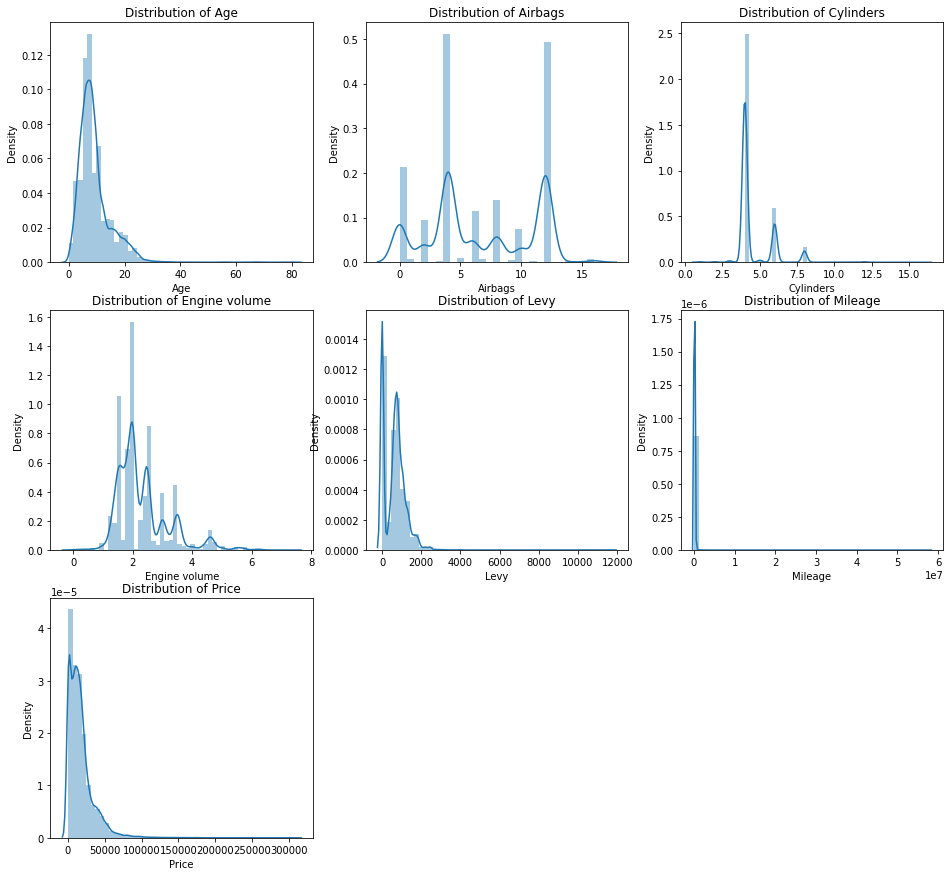

In [80]:
ncols = ["Age","Airbags","Cylinders","Engine volume","Levy","Mileage","Price"]
plt.figure(figsize=(16,15))
for i,col in enumerate(ncols):
    plt.subplot(3,3,i+1).set_title("Distribution of "+col)
    sns.distplot(df_train[col])

Text(0.5, 1.0, 'Distribution of Levy > 0')

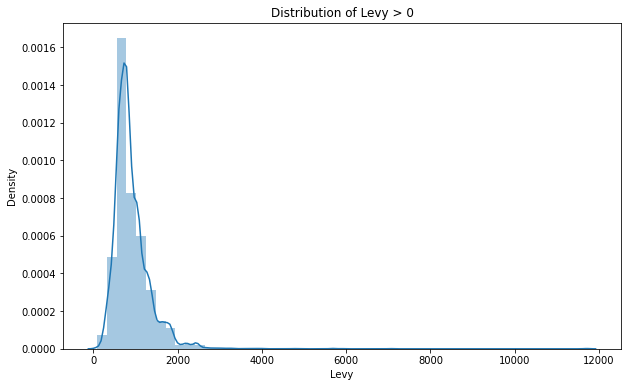

In [81]:
plt.figure(figsize=(10,6))
sns.distplot(df_train.query('Levy>0')['Levy'])
plt.title("Distribution of Levy > 0")

1. **Age**:
    > Most of the values of Age are below 20 and the distribution is right skewed.
2. **Price**: 
    > Most of the values are below 50000 and the distribution is right skewed.
3. **Levy**:
    > It has an interesting plot showing it's majority values are 0 and then other than those majority values it is slightly right skewed and second majority being the range 500-700.
4. **Airbags**:
    > Most common number of Airbags in a car from our dataset is 4 followed by 12.
5. **Cylinders**:
    > Most common number of Cylinders in a car are 4 and 6.
4. **Engine volume**:
    > Leading Engine volumes are in the range 1-2.5 units.

### Multi-variate Analysis

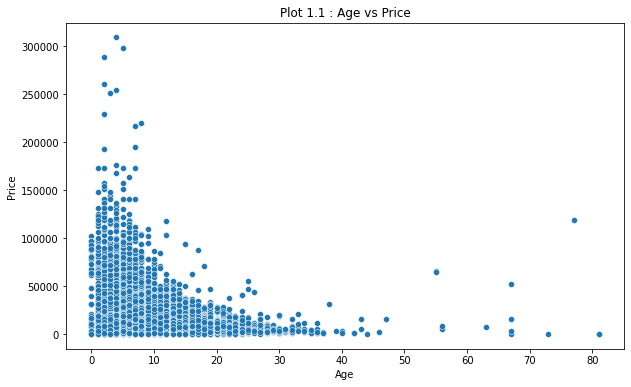

In [82]:
plt.figure(figsize=(10,6))
plt.title("Plot 1.1 : Age vs Price")
sns.scatterplot(x='Age',y='Price',data=df_train)
plt.show()

The above plot shows that Cars with Age above 20 don't attract much price with few exceptions, though the relation is not linear here but Age certainly is a strong feature for building the model.

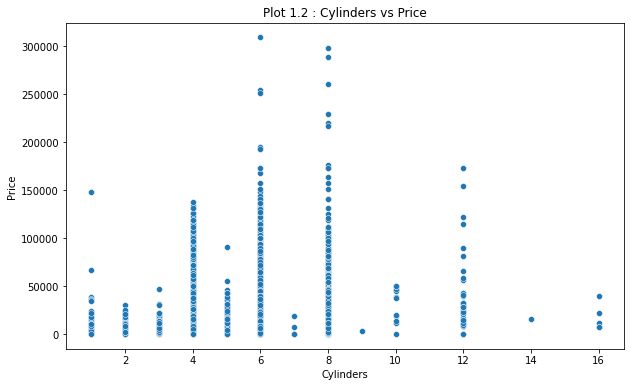

In [83]:
plt.figure(figsize=(10,6))
plt.title("Plot 1.2 : Cylinders vs Price")
sns.scatterplot(x='Cylinders',y='Price',data=df_train)
plt.show()

From above plot it is observed that prices are on higher side for cars with 6 and 12 cylinders. Though it is natural to expect that with increase in number of cylinders the price must go on rising but there are other factors acting behind scenes which are not allowing such relationship with cylinders.

<AxesSubplot:title={'center':'Plot 1.3 : Mileage vs Price'}, xlabel='Mileage', ylabel='Price'>

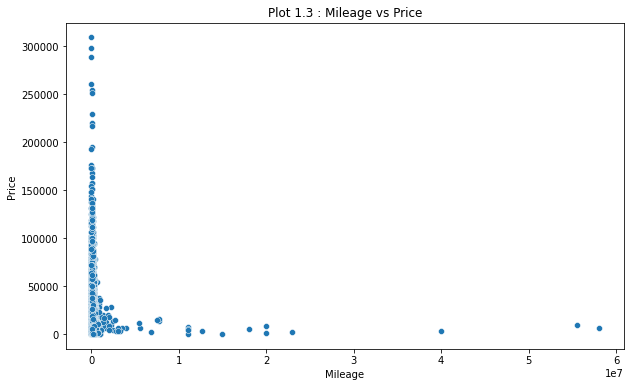

In [84]:
plt.figure(figsize=(10,6))
plt.title("Plot 1.3 : Mileage vs Price")
sns.scatterplot(x="Mileage",y="Price",data=df_train)

Mileage sure has an interesting relationship with Price, though it is evident that with increase in mileage price drops and it can be seen clearly in the below plots which is an attempt to visualize the relationship of two variables post decomposition of Mileage into two ranges.

q3,q1 = np.percentile(df_train["Mileage"],75),np.percentile(df_train["Mileage"],25)
iqr=q3-q1
print(q3+1.5*iqr)

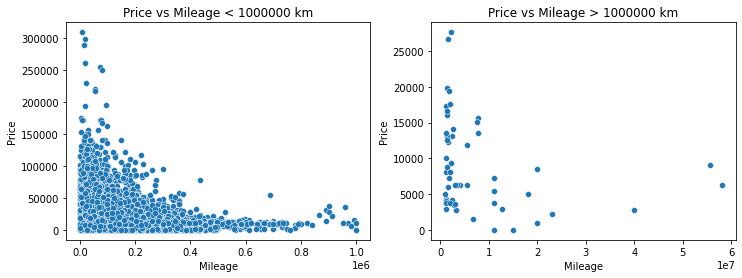

In [85]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1).set_title("Price vs Mileage < 1000000 km")
sns.scatterplot(x="Mileage",y="Price",data=df_train.query('Mileage<10**6'))
plt.subplot(1,2,2).set_title("Price vs Mileage > 1000000 km")
sns.scatterplot(x="Mileage",y="Price",data=df_train.query('Mileage>10**6'))
plt.show()

In [86]:
x1=df_train.query('Age<=20')['Age']
y1=np.log(df_train.query('Age<=20')['Mileage'])
z1=df_train.query('Age<=20')['Price']

x2=df_train.query('Age>20')['Age']
y2=np.log(df_train.query('Age>20')['Mileage'])
z2=df_train.query('Age>20')['Price']

In [87]:
df = df_train.copy()
df['Mileage'] = np.log(df['Mileage'])
fig = px.scatter_3d(df, x='Age', y='Mileage', z='Price',
                    color='Price',opacity=0.3)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))


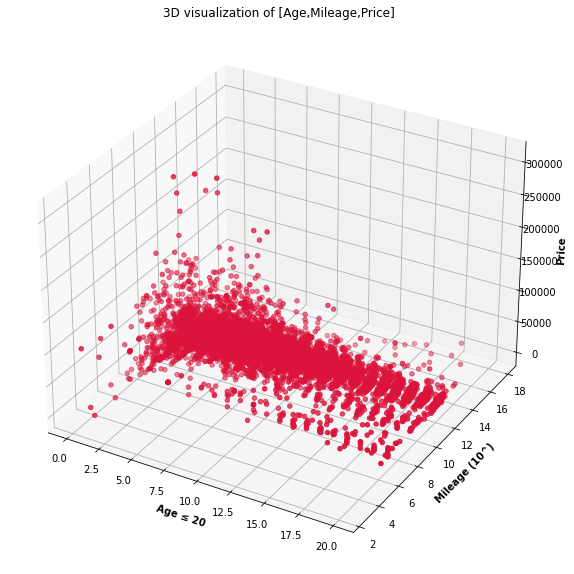

In [88]:
fig = plt.figure(figsize = (18,10))
ax1 = plt.axes(projection ="3d")
ax1.scatter3D(x1, y1, z1, color = "crimson",marker ='o')
plt.title("3D visualization of [Age,Mileage,Price]")
ax1.set_xlabel('Age ≤ 20', fontweight ='bold')
ax1.set_ylabel('Mileage (10^)', fontweight ='bold')
ax1.set_zlabel('Price', fontweight ='bold')
plt.show()

ax1.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

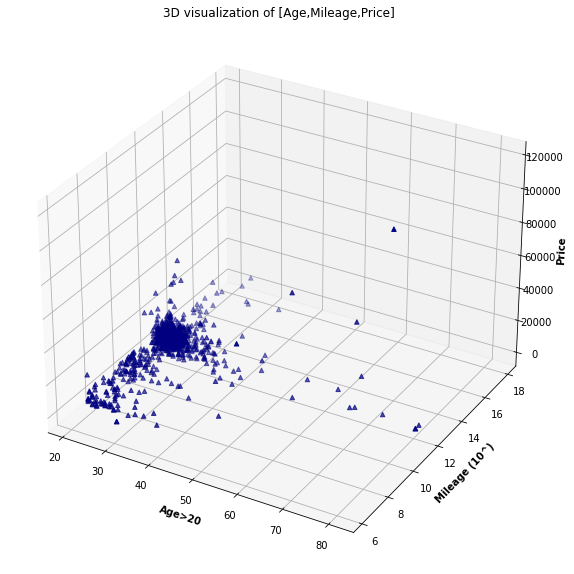

In [89]:
fig = plt.figure(figsize = (18,10))
ax2 = plt.axes(projection ="3d")
ax2.scatter3D(x2, y2, z2, color = "navy",marker='^')
plt.title("3D visualization of [Age,Mileage,Price]")
ax2.set_xlabel('Age>20', fontweight ='bold')
ax2.set_ylabel('Mileage (10^)', fontweight ='bold')
ax2.set_zlabel('Price', fontweight ='bold')
plt.show()

ax2.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

3-D plots give us insights about our data being densified in certain areas showing how age and mileage impact price of the car. 
> **Note** - For better viewing log values of Mileage have been plotted against natural values of Age and Price.

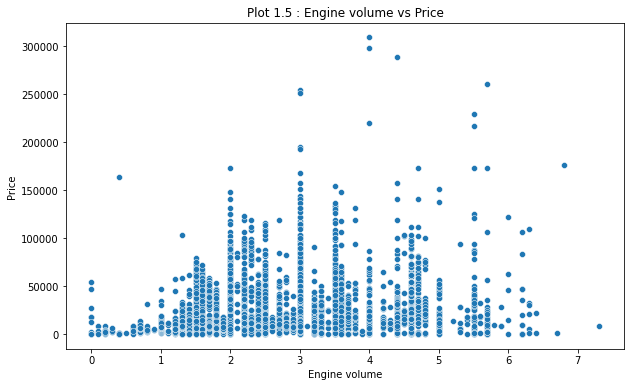

In [90]:
plt.figure(figsize=(10,6))
plt.title("Plot 1.5 : Engine volume vs Price")
sns.scatterplot(x='Engine volume',y='Price',data=df_train)
plt.show()

From above plot it is observed that prices are on higher side for cars with Engine volume 3 and 4 units.

<AxesSubplot:title={'center':'Plot 2.1 : [Engine Volume,Type] vs Price'}, xlabel='Engine volume', ylabel='Price'>

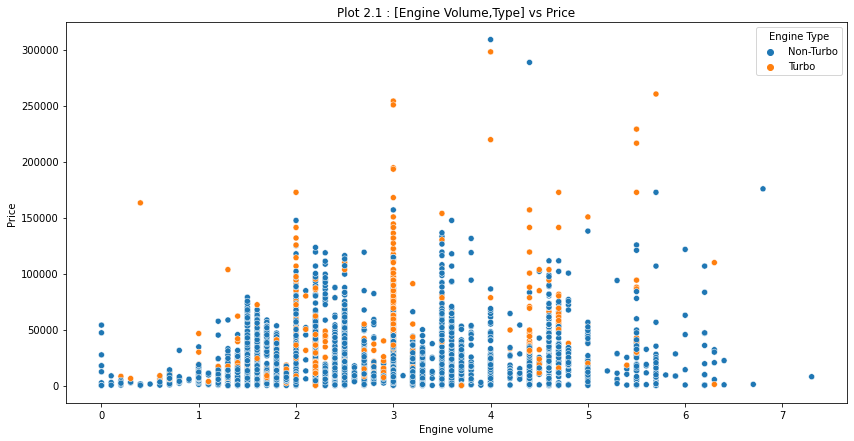

In [91]:
plt.figure(figsize=(14,7))
plt.title("Plot 2.1 : [Engine Volume,Type] vs Price")
sns.scatterplot(x="Engine volume",y="Price",hue="Engine Type",data=df_train)

Cars with Turbo engines cost more on the pocket than the normal engine types.

<AxesSubplot:title={'center':'Plot 2.2 : [Airbags,Doors] vs Price'}, xlabel='Airbags', ylabel='Price'>

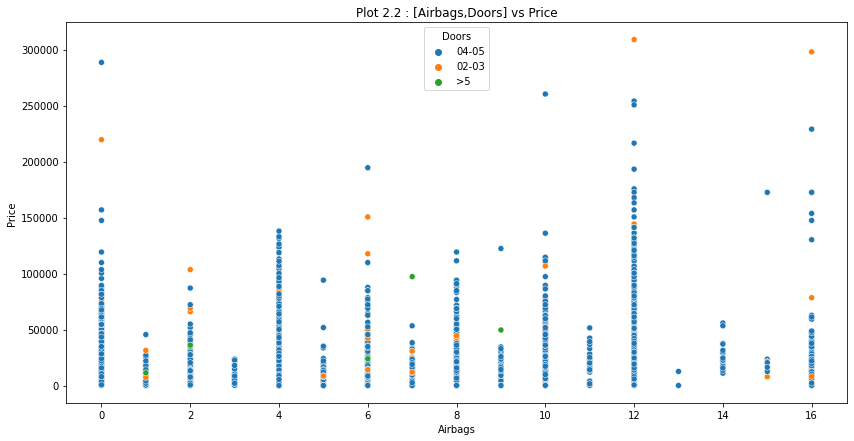

In [92]:
plt.figure(figsize=(14,7))
plt.title("Plot 2.2 : [Airbags,Doors] vs Price")
sns.scatterplot(x="Airbags",y="Price",hue="Doors",data=df_train)

Majority of cars have 04-05 doors and in them the range of price is varying to a great extent. Though cars with 02-03 doors and >5 seem to minority class and with no much clear inference to be drawn from above.

### Visualizing Categorical Data

<AxesSubplot:title={'center':'Top 10 Car Manufacturers - Avg Price'}, xlabel='Manufacturer'>

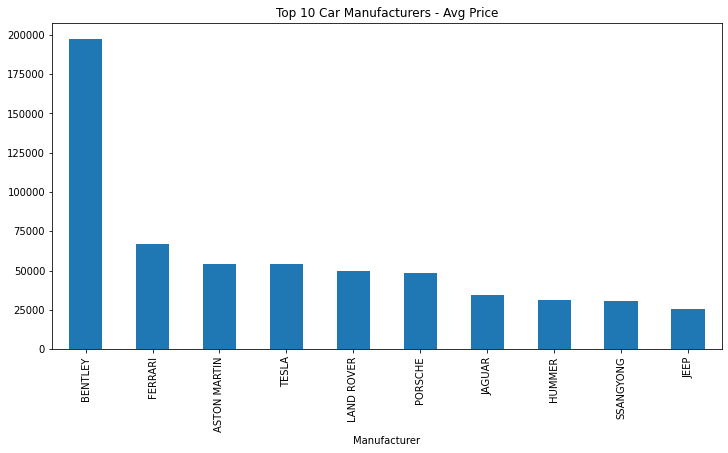

In [93]:
df = df_train.groupby("Manufacturer")["Price"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.title("Top 10 Car Manufacturers - Avg Price")
df.plot(kind='bar')

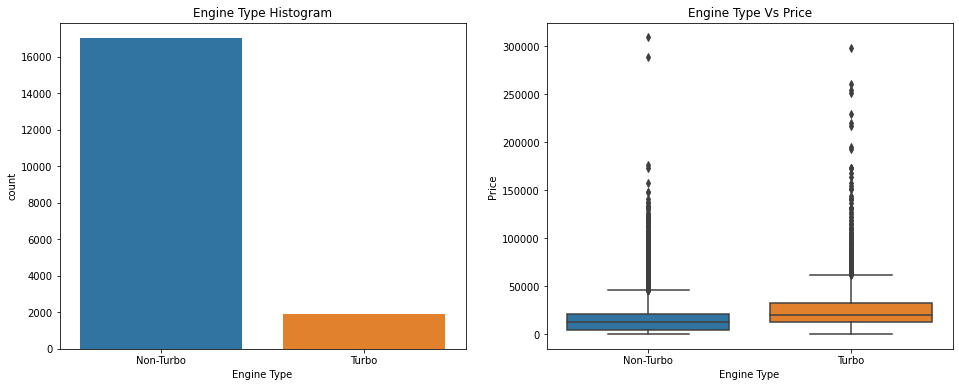

In [94]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x=df_train["Engine Type"])
plt.title("Engine Type Histogram")
plt.subplot(1,2,2)
sns.boxplot(x = "Engine Type", y = "Price", data = df_train)
plt.title("Engine Type Vs Price")
plt.show()

Inference:
1. Number of cars with turbo engines is less compared to the other category.
2. The box plots sure show that the difference in their prices vary with a huge margin. 
3. Two exceptions in Non-Turbo type for their manufacturer brands being Porsche and BMW.

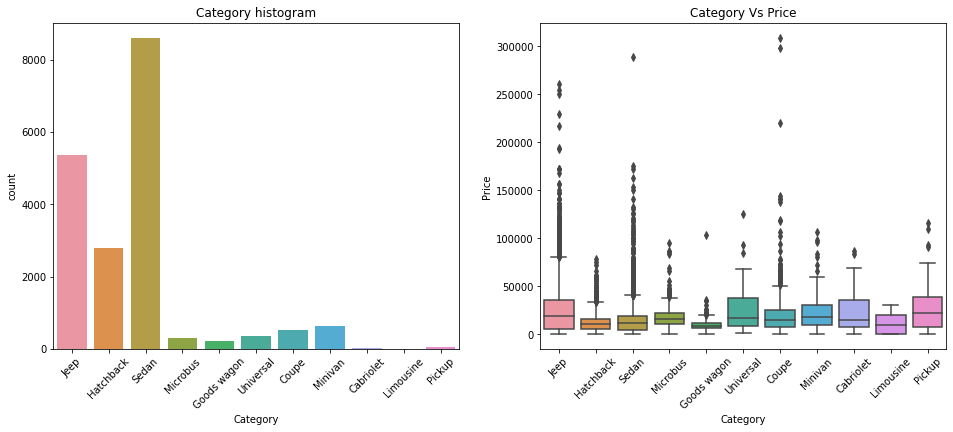

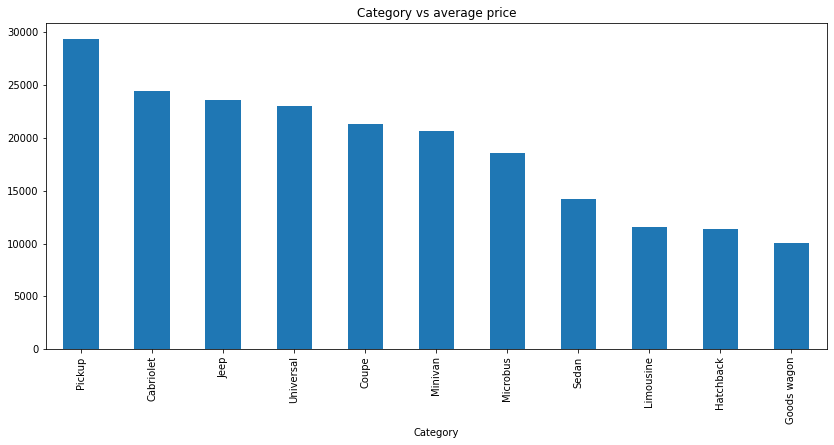

In [95]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x=df_train["Category"])
plt.title("Category histogram")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(x = "Category", y = "Price", data = df_train)
plt.title("Category Vs Price")
plt.xticks(rotation=45)
plt.show()

df = df_train.groupby("Category")["Price"].mean().sort_values(ascending=False)
plt.figure(figsize=(14,6))
plt.title("Category vs average price")
df.plot.bar()
plt.show()

Inference:
1. Sedan and Jeep are more favored compared to the other categories.
2. Jeep, Sedan and Coupe are having highest price ranges.

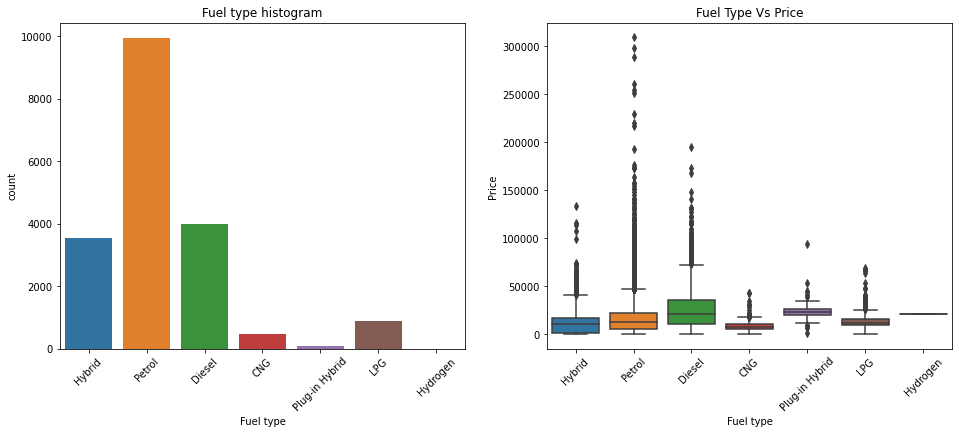

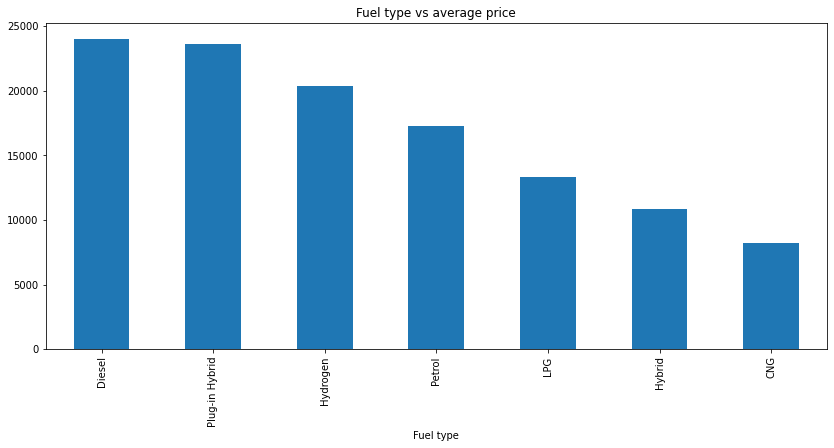

In [96]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x=df_train["Fuel type"])
plt.title("Fuel type histogram")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(x = "Fuel type", y = "Price", data = df_train)
plt.title("Fuel Type Vs Price")
plt.xticks(rotation=45)
plt.show()

df = df_train.groupby("Fuel type")["Price"].mean().sort_values(ascending=False)
plt.figure(figsize=(14,6))
plt.title("Fuel type vs average price")
df.plot.bar()
plt.show()

Inference:
1. Petrol is most favored compared to the other categories.
2. Petrol and Diesel are having highest price ranges.

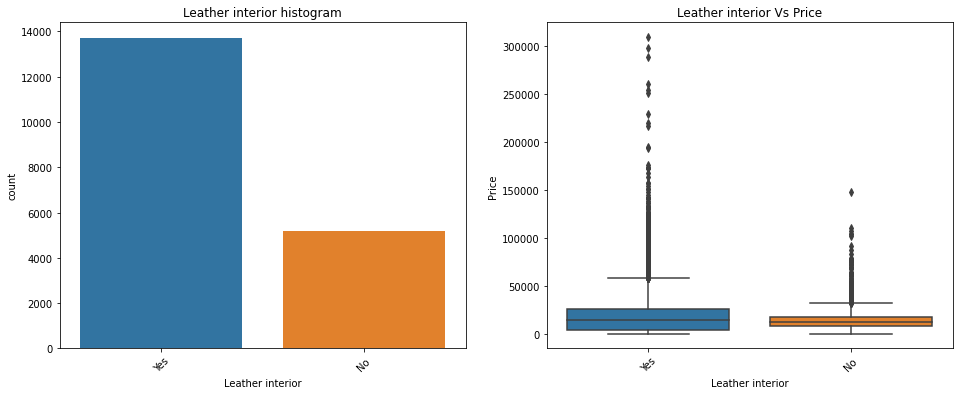

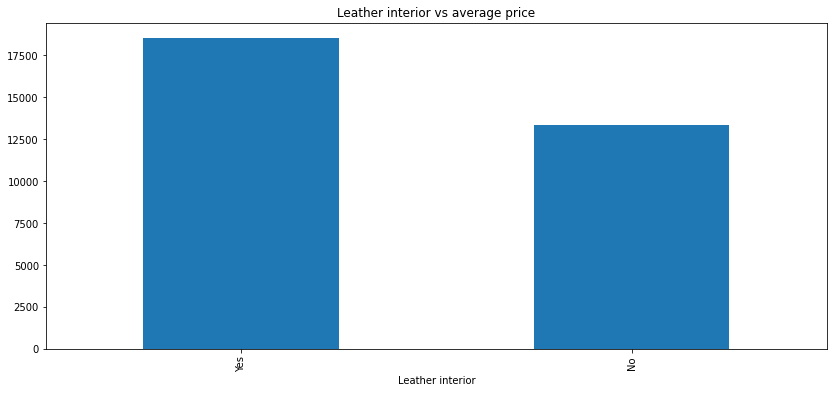

In [97]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x=df_train["Leather interior"])
plt.title("Leather interior histogram")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(x = "Leather interior", y = "Price", data = df_train)
plt.title("Leather interior Vs Price")
plt.xticks(rotation=45)
plt.show()

df = df_train.groupby("Leather interior")["Price"].mean().sort_values(ascending=False)
plt.figure(figsize=(14,6))
plt.title("Leather interior vs average price")
df.plot.bar()
plt.show()

Inference:
1. Most cars have leather interior and the price of car with leather interior is higher than those without leather interior.

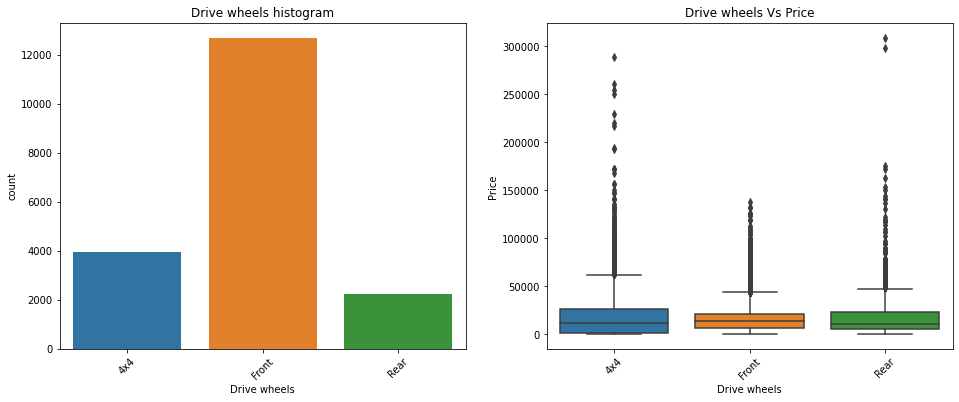

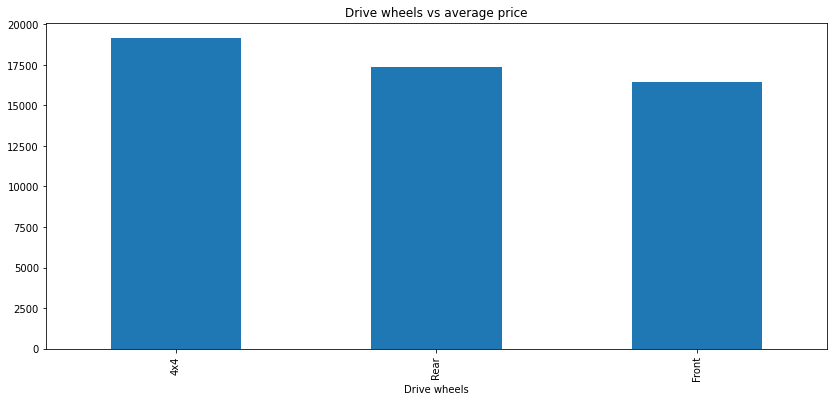

In [98]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x=df_train["Drive wheels"])
plt.title("Drive wheels histogram")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(x = "Drive wheels", y = "Price", data = df_train)
plt.title("Drive wheels Vs Price")
plt.xticks(rotation=45)
plt.show()

df = df_train.groupby("Drive wheels")["Price"].mean().sort_values(ascending=False)
plt.figure(figsize=(14,6))
plt.title("Drive wheels vs average price")
df.plot.bar()
plt.show()

Inference:
1. Front is most favored compared to the other two categories.
2. 4X4 is having highest price range followed by Rear with two exceptions.

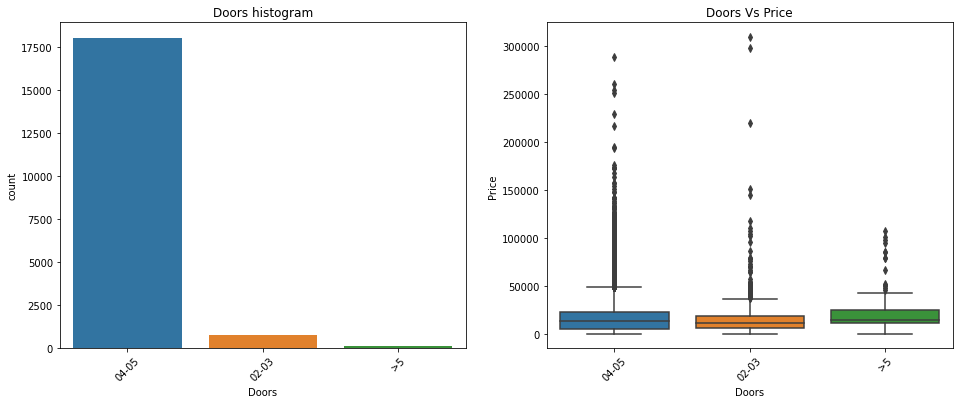

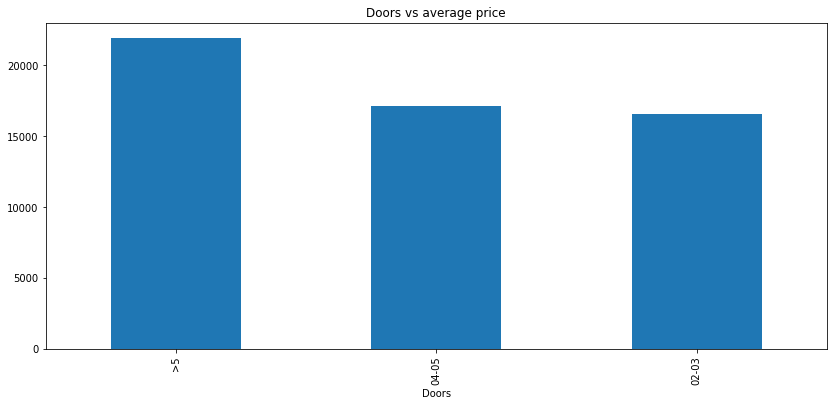

In [99]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x=df_train["Doors"])
plt.title("Doors histogram")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(x = "Doors", y = "Price", data = df_train)
plt.title("Doors Vs Price")
plt.xticks(rotation=45)
plt.show()

df = df_train.groupby("Doors")["Price"].mean().sort_values(ascending=False)
plt.figure(figsize=(14,6))
plt.title("Doors vs average price")
df.plot.bar()
plt.show()

Inference:
1. 04-05 is most common amongst the three categories.
2. 04-05 is having highest price range followed by 02-03 with few exceptions.

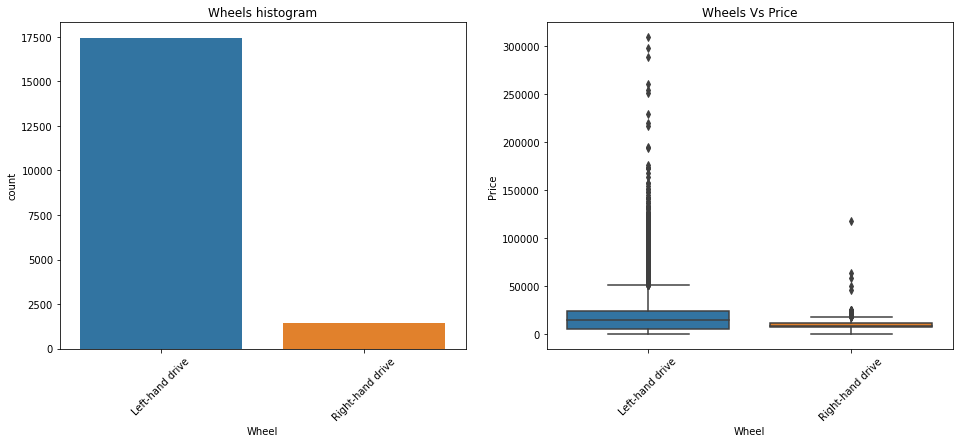

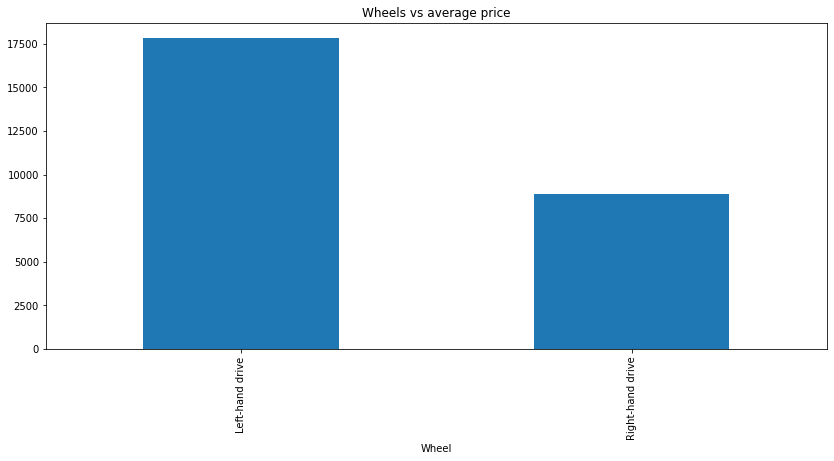

In [100]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x=df_train["Wheel"])
plt.title("Wheels histogram")
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(x = "Wheel", y = "Price", data = df_train)
plt.title("Wheels Vs Price")
plt.xticks(rotation=45)
plt.show()

df = df_train.groupby("Wheel")["Price"].mean().sort_values(ascending=False)
plt.figure(figsize=(14,6))
plt.title("Wheels vs average price")
df.plot.bar()
plt.show()

Inference:
1. Left-hand drive is common type amongst the two categories.

## Model Building and Prediction

### Preprocessing of categorical and numerical columns

In [101]:
scaler = MinMaxScaler()
le = LabelEncoder()

In [102]:
X = df_train.copy()

In [103]:
y = X.pop("Price")

In [104]:
X.columns

Index(['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Engine Type', 'Age'],
      dtype='object')

In [105]:
catcols = [col for col in X.columns if X[col].dtype=="object"]
catcols.remove('Prod. year')

In [106]:
numcols = [col for col in X.columns if X[col].dtype in (int,float)]

In [107]:
print(catcols, numcols)

['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Engine Type'] ['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Age']


cols_le = ['Manufacturer', 'Model', 'Category','Color']
cols_ohc = ['Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Engine Type']

In [108]:
numcols

['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Age']

In [109]:
for col in catcols:
    le.fit(list(X[col].values)+list(df_test[col].values))
    X[col] = le.transform(list(X[col].values))
    df_test[col] = le.transform(list(df_test[col].values))

In [110]:
X["Manufacturer"].nunique()

64

In [111]:
df_test["Manufacturer"].nunique()

62

In [112]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3,random_state=49)

In [113]:
X_train[numcols] = scaler.fit_transform(X_train[numcols])
X_valid[numcols] =scaler.transform(X_valid[numcols])

In [114]:
df_test[numcols] = scaler.transform(df_test[numcols])

In [115]:
#ohc_X_train = pd.DataFrame(ohc.fit_transform(X_train[cols_ohc]))
#ohc_X_train.columns = ohc.get_feature_names(cols_ohc)
#ohc_X_train.index = X_train.index

#ohc_X_valid = pd.DataFrame(ohc.transform(X_valid[cols_ohc]))
#ohc_X_valid.columns = ohc.get_feature_names(cols_ohc)
#ohc_X_valid.index = X_valid.index

#ohc_test = pd.DataFrame(ohc.transform(df_test[cols_ohc]))
#ohc_test.columns = ohc.get_feature_names(cols_ohc)
#ohc_test.index = df_test.index

#X_train_ = pd.concat([X_train[numcols],X_train[cols_le],ohc_X_train],axis=1)
#X_valid_ = pd.concat([X_valid[numcols],X_valid[cols_le],ohc_X_valid],axis=1)
#test = pd.concat([df_test[numcols],df_test[cols_le],ohc_test],axis=1)

In [116]:
train = pd.concat([X_train[numcols],X_train[catcols]],axis=1)
valid = pd.concat([X_valid[numcols],X_valid[catcols]],axis=1)
test = pd.concat([df_test[numcols],df_test[catcols]],axis=1)

In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13229 entries, 824 to 441
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Levy              13229 non-null  float64
 1   Engine volume     13229 non-null  float64
 2   Mileage           13229 non-null  float64
 3   Cylinders         13229 non-null  float64
 4   Airbags           13229 non-null  float64
 5   Age               13229 non-null  float64
 6   Manufacturer      13229 non-null  int32  
 7   Model             13229 non-null  int32  
 8   Category          13229 non-null  int32  
 9   Leather interior  13229 non-null  int32  
 10  Fuel type         13229 non-null  int32  
 11  Gear box type     13229 non-null  int32  
 12  Drive wheels      13229 non-null  int32  
 13  Doors             13229 non-null  int32  
 14  Wheel             13229 non-null  int32  
 15  Color             13229 non-null  int32  
 16  Engine Type       13229 non-null  int32 

In [118]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5670 entries, 4324 to 7599
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Levy              5670 non-null   float64
 1   Engine volume     5670 non-null   float64
 2   Mileage           5670 non-null   float64
 3   Cylinders         5670 non-null   float64
 4   Airbags           5670 non-null   float64
 5   Age               5670 non-null   float64
 6   Manufacturer      5670 non-null   int32  
 7   Model             5670 non-null   int32  
 8   Category          5670 non-null   int32  
 9   Leather interior  5670 non-null   int32  
 10  Fuel type         5670 non-null   int32  
 11  Gear box type     5670 non-null   int32  
 12  Drive wheels      5670 non-null   int32  
 13  Doors             5670 non-null   int32  
 14  Wheel             5670 non-null   int32  
 15  Color             5670 non-null   int32  
 16  Engine Type       5670 non-null   int32

In [119]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Levy              8245 non-null   float64
 1   Engine volume     8245 non-null   float64
 2   Mileage           8245 non-null   float64
 3   Cylinders         8245 non-null   float64
 4   Airbags           8245 non-null   float64
 5   Age               8245 non-null   float64
 6   Manufacturer      8245 non-null   int32  
 7   Model             8245 non-null   int32  
 8   Category          8245 non-null   int32  
 9   Leather interior  8245 non-null   int32  
 10  Fuel type         8245 non-null   int32  
 11  Gear box type     8245 non-null   int32  
 12  Drive wheels      8245 non-null   int32  
 13  Doors             8245 non-null   int32  
 14  Wheel             8245 non-null   int32  
 15  Color             8245 non-null   int32  
 16  Engine Type       8245 non-null   int32  


Defining models

In [120]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
rfr = RandomForestRegressor()
xgb = XGBRegressor()

In [121]:
score(train,valid,y_train,y_valid,model)

0.98022

params_grid = {
    'max_depth' : [25,50,75,100],
    'n_estimators': n
}

In [122]:
msle_ = make_scorer(msle, greater_is_better=False)
mse_ = make_scorer(mse, greater_is_better=False)
mae_ = make_scorer(mae,greater_is_better=False)

In [123]:
n = np.linspace(100,500,dtype=int,num=5)

param_grid = {  'bootstrap': [True], 
              'max_depth': [25,50,75,100,None],
             'max_features': ['auto'],
              'min_samples_leaf':[1],
              'n_estimators': n}

In [124]:
gridmodel = GridSearchCV(estimator = rfr,param_grid=param_grid,scoring=mse_,n_jobs=-1,cv=4,verbose=2)

In [125]:
gridmodel.fit(X,np.log(y))

Fitting 4 folds for each of 25 candidates, totalling 100 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [25, 50, 75, 100, None],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'n_estimators': array([100, 200, 300, 400, 500])},
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=2)

In [126]:
print('Best Params:', gridmodel.best_params_)
print('Best CV Score:', -gridmodel.best_score_)

Best Params: {'bootstrap': True, 'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 300}
Best CV Score: 0.8058813937313498


Iterative hyperparameter tuning.

In [127]:
layout = "{0:>8}{1:>15}{2:>18}"
print("n_estimators","\t","max_depth","  \t","rmsle")
for my in np.linspace(100,500,dtype=int,num=5):
    for g in np.linspace(25,100,dtype=int,num=4):
        rfr = RandomForestRegressor(n_estimators=my,max_depth=g,min_samples_leaf=1,n_jobs=-1,random_state=1)
        print(layout.format(my,g,score(train,valid,y_train,y_valid,rfr)))

n_estimators 	 max_depth   	 rmsle
     100             25           0.97701
     100             50           0.97645
     100             75           0.97645
     100            100           0.97645
     200             25           0.97831
     200             50           0.97649
     200             75           0.97649
     200            100           0.97649
     300             25           0.97782
     300             50           0.97674
     300             75           0.97674
     300            100           0.97674
     400             25            0.9779
     400             50           0.97714
     400             75           0.97714
     400            100           0.97714
     500             25           0.97792
     500             50           0.97701
     500             75           0.97701
     500            100           0.97701


In [128]:
best_model = RandomForestRegressor(n_estimators=100,max_depth=50,min_samples_leaf=1,n_jobs=-1,random_state=1)

In [129]:
best_model.fit(train,y_train)

RandomForestRegressor(max_depth=50, n_jobs=-1, random_state=1)

In [130]:
score(train,valid,y_train,y_valid,best_model)

0.97645

In [131]:
xgbr = XGBRegressor()

In [132]:
xparams_grid = {
        'n_estimators' : [100,200,300],
        'min_child_weight': [1],
        'gamma': [0.5],
        'learning_rate': [0.02,0.01,0.005],
        'colsample_bytree': [0.6],
        'max_depth': [30]
        }

In [133]:
gridmodel = GridSearchCV(estimator = xgbr,param_grid=xparams_grid,scoring=mse_,n_jobs=-1,cv=4,verbose=2)

In [134]:
gridmodel.fit(train,np.log(y_train))

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [135]:
print('Best Params:', gridmodel.best_params_)
print('Best CV Score:', -gridmodel.best_score_)

Best Params: {'colsample_bytree': 0.6, 'gamma': 0.5, 'learning_rate': 0.02, 'max_depth': 30, 'min_child_weight': 1, 'n_estimators': 300}
Best CV Score: 0.9701600415313032


Iterative tuning of hyperparameters, since rmsle metric is not available in GridSearchCV or RandomisedSearchCV

In [ ]:
a,b,c,d=[],[],[],[]
n = np.array(np.linspace(100,400,dtype=int,num=4))
for i in n:
    for j in [30,60]:
        for k in [0.05,0.03,0.02,0.01]: 
            a.append(i)
            b.append(j)
            xgb = XGBRegressor(n_estimators=i,gamma=0.5,learning_rate=k,n_jobs=-1,colsample_bylevel=0.6,max_depth=j)
            c.append(k)
            d.append(score(train,valid,y_train,y_valid,xgb))

data={'n_estimators':a,'max_depth':b,'learning_rate':c,'rmsle':d}
scores=pd.DataFrame(data=data)
scores.sort_values('rmsle')

In [ ]:
best_xgb = XGBRegressor(n_estimators=200,gamma=0.1,colsample_bylevel=0.6,
                        max_depth=30,learning_rate=0.01)

In [ ]:
print("rmsle:",score(train,valid,y_train,y_valid,best_xgb))

In [ ]:
pred_x = best_xgb.predict(valid)
print("validation - min:",np.min(y_valid),"max:",np.max(y_valid),"mean:",\
      round(np.mean(y_valid)),"variance:",round(np.var(y_valid)))
print("predicted - min:",round(np.min(pred_x)),"max:",round(np.max(pred_x)),\
      "mean:",round(np.mean(pred_x)),"variance:",round(np.var(pred_x)))

In [ ]:
md=[]
sc=[]
for l in np.linspace(10,100,dtype=int,num=10):
    md.append(l)
    gbr = XGBRegressor(n_estimators=1000,gamma=0.1,colsample_bylevel=0.6,
                        max_depth=l,learning_rate=0.002,n_jobs=-1)
    sc.append(score(train,valid,y_train,y_valid,gbr))

data={'max_depth':md,'rmsle':sc}
scores=pd.DataFrame(data=data)
scores.sort_values('rmsle')

In [ ]:
best_xgb.fit(train,y_train)

In [ ]:
pred_x = best_xgb.predict(valid)

In [ ]:
pred_first = best_xgb.predict(test)
print(np.percentile(pred_first,0.3),np.min(pred_first),np.max(pred_first))
pred_rfr = best_model.predict(test)
pred_first = np.where(pred_first<0,np.min(pred_rfr),pred_first)

In [ ]:
submission = pd.Series(pred_first,name="Price")
submission.to_csv("submission_car_price.csv",index=False)

## ML Explainability

Machine learning models are considered as "black boxes", in the sense that they can make good predictions but you can't understand the logic behind those predictions. But there are many ways to extract what is going inside the black box which we build around our data sets.

Feature Importance:
> Below we will use *Permutation Importance* from **eli5** library which helps us understand importance of each Feature and rank them accordingly.

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
best_xgb.fit(train,y_train)

In [ ]:
perm = PermutationImportance(best_xgb, random_state=1).fit(valid, y_valid)
eli5.show_weights(perm, feature_names = valid.columns.tolist())

**Inference:**

   > It can be seen from above that **Price** of a car is mostly dependent on "Age" followed by number of "Airbags", "Gear box type" and "Mileage".
    > "Wheel" and "Doors" seem to contribute least in deciding the **Price** of a car.

In [ ]:
pred_x = best_xgb.predict(valid)

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1).set_title("Target values")
sns.scatterplot(x=X_valid['ID'],y=np.log(y_valid))
plt.subplot(1,2,2).set_title("Predicted values")
sns.scatterplot(x=X_valid['ID'],y=np.log(pred_x))
plt.show()

In [ ]:
plt.figure(figsize=(9,9))
plt.title("Predicted vs Target values")
sns.regplot(x=np.log(pred_x),y=np.log(y_valid),marker='^',\
            scatter_kws={"color": "lightskyblue"},line_kws={"color": "firebrick"})
plt.xlabel("Predicted values (log)")
plt.ylabel("Target values (log)")
plt.show()

In [ ]:
error = pred_x-y_valid

plt.figure(figsize=(9,6))
plt.title("Residual Analysis")
sns.distplot(error,bins=20)
plt.xlabel("Error values")
plt.ylabel("Prob density")
plt.show()

From the above plots it can be seen that our model predicted performed better with few exceptions in the lower side of prices.
Error terms are gradually distributed in the range -50,000 to 50,000.

# **End**